# Logistic Regression with multiple predictors

### Setup

In [23]:
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

### Import data

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/resume.csv')
df = df[['received_callback', 'honors', 'job_city', 'years_experience', 'military', 'has_email_address', 'race', 'gender', 'college_degree']]

### Data structure

In [25]:
df

,received_callback,honors,job_city,years_experience,military,has_email_address,race,gender,college_degree
0,0,0,Chicago,6,0,0,white,f,1
1,0,0,Chicago,6,1,1,white,f,0
2,0,0,Chicago,6,0,0,black,f,1
3,0,0,Chicago,6,0,1,black,f,0
4,0,0,Chicago,22,0,1,white,f,0
...,...,...,...,...,...,...,...,...,...
4865,0,0,Boston,1,0,0,black,f,0
4866,0,0,Boston,6,0,0,black,f,1
4867,0,0,Boston,8,0,1,white,m,1
4868,0,0,Boston,2,1,1,black,f,1


In [26]:
df['received_callback'].value_counts()

received_callback
0    4478
1     392
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   received_callback  4870 non-null   int64 
 1   honors             4870 non-null   int64 
 2   job_city           4870 non-null   object
 3   years_experience   4870 non-null   int64 
 4   military           4870 non-null   int64 
 5   has_email_address  4870 non-null   int64 
 6   race               4870 non-null   object
 7   gender             4870 non-null   object
 8   college_degree     4870 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 342.5+ KB


Prepare data for scikit-learn model:

In [28]:
df = pd.get_dummies(df, prefix = ['job_city', 'race', 'gender'])

df

,received_callback,honors,years_experience,military,has_email_address,college_degree,job_city_Boston,job_city_Chicago,race_black,race_white,gender_f,gender_m
0,0,0,6,0,0,1,False,True,False,True,True,False
1,0,0,6,1,1,0,False,True,False,True,True,False
2,0,0,6,0,0,1,False,True,True,False,True,False
3,0,0,6,0,1,0,False,True,True,False,True,False
4,0,0,22,0,1,0,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4865,0,0,1,0,0,0,True,False,True,False,True,False
4866,0,0,6,0,0,1,True,False,True,False,True,False
4867,0,0,8,0,1,1,True,False,False,True,False,True
4868,0,0,2,1,1,1,True,False,True,False,True,False


### Variable lists

In [29]:
# Prepare the data
y_label = 'received_callback'

features = ["job_city_Chicago", 
            "college_degree",
            "years_experience",
            "honors",
            "military",
            "has_email_address",
            "race_white",
            "gender_m"
            ]

X = df[features]
y = df[y_label]

### Data split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

### Select model

In [31]:
clf = LogisticRegressionCV(cv=5, random_state=0)

### Training

In [32]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=0)

In [33]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(cv=5, random_state=0)>

In [34]:
clf.score(X_train, y_train)

0.9190378410090936

### Coefficients

In [35]:
clf.intercept_

array([-2.56291775])

In [36]:
clf.coef_

array([[-0.00195985, -0.00044132,  0.01672936,  0.00123163, -0.00080931,
         0.00015201,  0.00288716, -0.00046124]])

### Evaluation on test set

In [37]:
y_pred = clf.predict(X_test)

In [38]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.920602327173169

### Evaluation on test set

In [39]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.920602327173169

### Confusion matrix

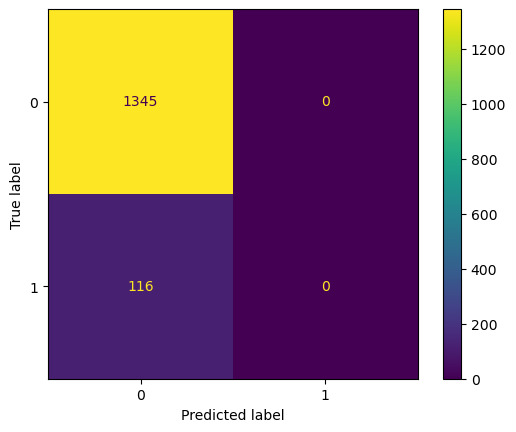

In [40]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Classification report

In [41]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['0', '1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1345
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461



### ROC Curve

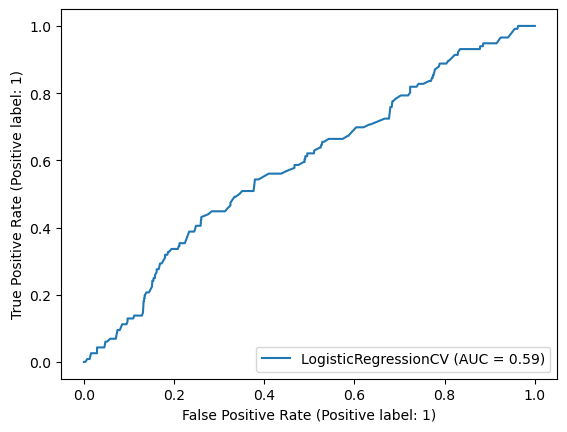

In [42]:

RocCurveDisplay.from_estimator(clf, X_test, y_test);

### AUC Score

In [43]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.5881137033713626

Option 2 to obtain AUC:

In [44]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.5881137033713626

### Change threshold

Use specific threshold

In [45]:
# obtain probabilities
pred_proba = clf.predict_proba(X_test)

In [46]:
# set threshold to 0.25

df_25 = pd.DataFrame({'y_pred': pred_proba[:,1] > .25})

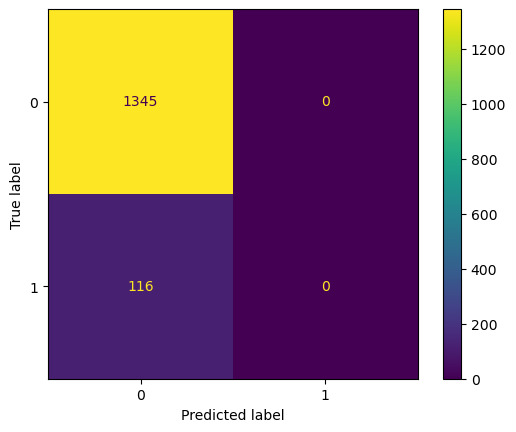

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, df_25['y_pred']);

### Classification report

In [48]:
print(classification_report(y_test, df_25['y_pred'], target_names=['0', '1'], zero_division=0))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1345
           1       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461

